In [1]:
import pandas as pd

train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

print(train.shape)
train.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Basic info
train.info()

# Preview first few rows
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isna().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [7]:
train = train.drop(columns=["Cabin"])
test = test.drop(columns=["Cabin"])


In [11]:
# Fill missing Embarked values with mode (most frequent)
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

# Fill missing Age values with median
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(train["Age"].median())

# Fill missing Fare in test set with median
test["Fare"] = test["Fare"].fillna(train["Fare"].median())


In [13]:
# Encode 'Sex' and 'Embarked' columns
train["Sex"] = train["Sex"].map({"male": 0, "female": 1})
test["Sex"] = test["Sex"].map({"male": 0, "female": 1})

embarked_map = {"S": 0, "C": 1, "Q": 2}
train["Embarked"] = train["Embarked"].map(embarked_map)
test["Embarked"] = test["Embarked"].map(embarked_map)

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [15]:
# Drop columns that are identifiers or text-heavy
test_passenger_ids = test["PassengerId"]  # store for later prediction output
train = train.drop(columns=["PassengerId", "Name", "Ticket"])
test = test.drop(columns=["PassengerId", "Name", "Ticket"])

train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [17]:
# Separate features and target variable
X = train.drop(columns=["Survived"])
y = train["Survived"]

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (891, 7)
Target vector shape: (891,)


Validation Accuracy: 0.7877094972067039

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.85       110
           1       0.86      0.54      0.66        69

    accuracy                           0.79       179
   macro avg       0.81      0.74      0.75       179
weighted avg       0.80      0.79      0.77       179



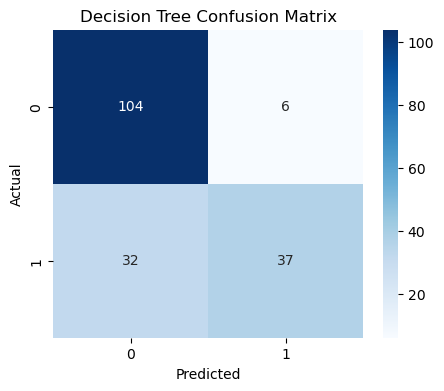

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


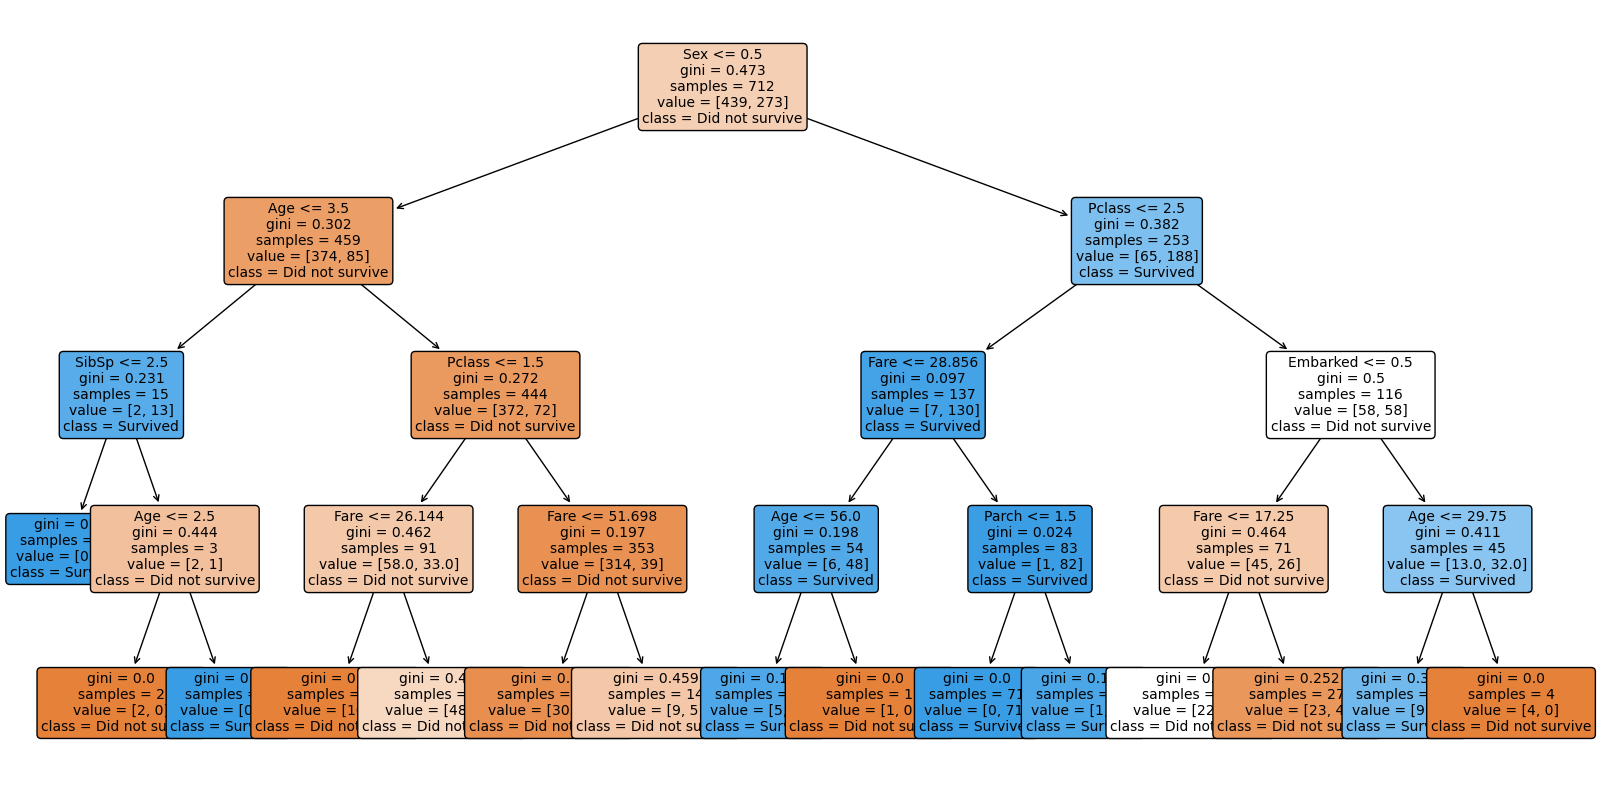

In [21]:
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    filled=True,
    feature_names=X.columns,
    class_names=["Did not survive", "Survived"],
    rounded=True,
    fontsize=10
)
plt.show()


In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean Accuracy:", np.mean(scores))


Cross-validation scores: [0.75977654 0.8258427  0.81460674 0.78651685 0.84269663]
Mean Accuracy: 0.8058878915322328


Validation Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



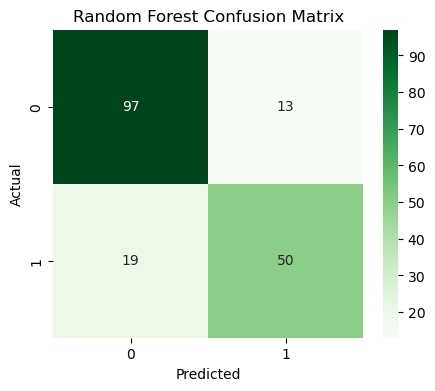

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None, 
    random_state=42, 
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))

# Confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [27]:
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", rf_scores)
print("Mean Accuracy:", np.mean(rf_scores))


Cross-validation scores: [0.7877095  0.80898876 0.84269663 0.7752809  0.82022472]
Mean Accuracy: 0.8069801016885318


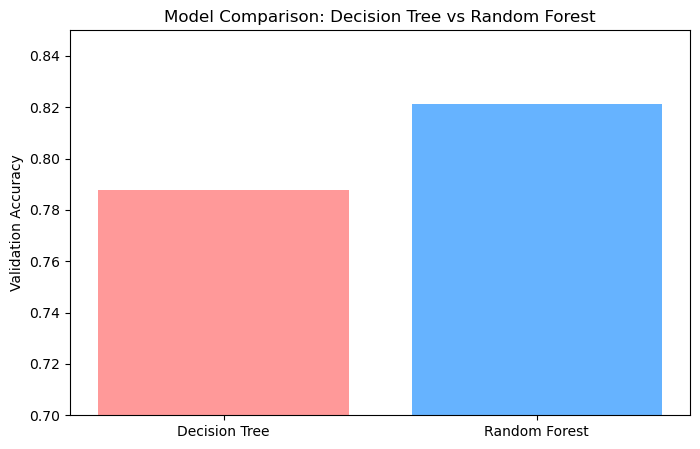

,Model,Validation Accuracy,Mean CV Accuracy,F1 Score (Survived)
0,Decision Tree,0.7877,0.8058,0.66
1,Random Forest,0.8212,0.8069,0.76


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Manually record metrics from Decision Tree and Random Forest
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Validation Accuracy': [0.7877, 0.8212],
    'Mean CV Accuracy': [0.8058, 0.8069],
    'F1 Score (Survived)': [0.66, 0.76]
})

# Plot
plt.figure(figsize=(8,5))
plt.bar(results['Model'], results['Validation Accuracy'], color=['#ff9999','#66b3ff'])
plt.title("Model Comparison: Decision Tree vs Random Forest")
plt.ylabel("Validation Accuracy")
plt.ylim(0.7, 0.85)
plt.show()

results


Summary:

Both models perform well on the Titanic dataset, achieving 79–82% accuracy.

The Random Forest slightly outperforms the Decision Tree, especially in F1 Score for the “Survived” class.

Feature importance analysis (in next steps) could show which variables — like Sex, Fare, and Pclass — drive survival predictions the most.

Overall, the Random Forest is chosen as the final model for Task 1 due to higher generalization and stability across folds.